In [2]:
#importamos librerías necesarias y generamos dataframe a partir de los datos
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
import json
import plotly.express as px
from plotly.subplots import make_subplots

#generamos dataframe
gun_weather = pd.read_csv('C:\coderhouse\coderhouse\proyecto_final\gun_violence_full.csv')

In [3]:
gun_weather.head()

,incident_id,date,state,city_or_county,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
0,92114,2014-01-01,Kentucky,Lexington,0,1,38.0507,-84.4829,NaN,2.0,...,0,0,0,0,0,0,0,0,0,0
1,92117,2014-01-01,Kentucky,Cynthiana,0,1,38.4333,-84.3542,1.0,NaN,...,1,0,0,0,1,0,0,0,1,0
2,92119,2014-01-01,Kentucky,Louisville,0,1,38.2501,-85.8150,NaN,2.9,...,0,0,0,0,0,0,0,0,0,0
3,92125,2014-01-01,Oklahoma,Lawton,0,0,34.6347,-98.4222,NaN,3.6,...,1,0,0,0,0,0,0,1,0,0
4,92131,2014-01-01,New York,Bronx,0,1,40.8179,-73.8628,NaN,-1.4,...,0,0,0,0,0,0,0,0,0,0


In [8]:
gun_weather_temp = gun_weather.groupby(['tavg']).sum()

In [22]:
print(gun_weather_temp['incident_amount'])

tavg
-39.7    2
-38.5    1
-35.8    1
-35.7    1
-34.2    1
        ..
 39.3    3
 39.5    1
 40.0    2
 40.7    2
 42.5    1
Name: incident_amount, Length: 660, dtype: int64


<AxesSubplot:xlabel='tavg'>

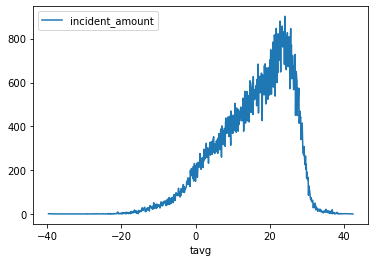

In [19]:
gun_weather_temp.plot(y='incident_amount')

<AxesSubplot:xlabel='tavg'>

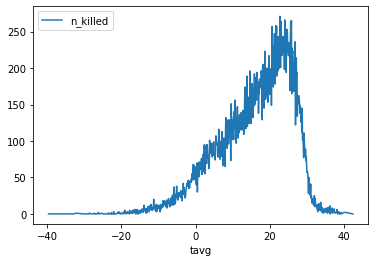

In [20]:
gun_weather_temp.plot(y='n_killed')

<AxesSubplot:xlabel='tavg'>

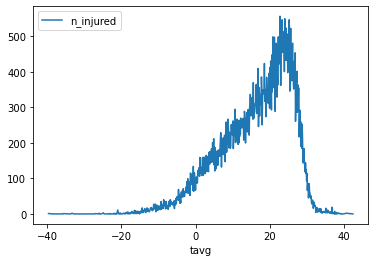

In [21]:
gun_weather_temp.plot(y='n_injured')

In [23]:
gun_weather_pres = gun_weather.groupby(['pres']).sum()

In [27]:
gun_weather_pres.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,tmin,tmax,prcp,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
count,5.790000e+02,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,...,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,1.228046e+08,68.723661,133.820380,8774.730003,-20774.401145,151.495682,3715.121416,2508.194473,4993.044041,396.411054,...,176.409326,11.848014,0.583765,14.245250,165.815199,4.856649,2.892919,82.150259,86.846287,9.039724
std,1.638583e+08,93.264031,183.185081,11590.281496,27940.464826,198.469136,5869.309677,4297.970541,7579.303679,605.929865,...,234.680229,16.240655,1.165157,19.731378,220.565337,7.177086,4.210171,113.331128,112.931520,12.443651
min,9.803100e+04,0.000000,0.000000,35.224100,-96754.137800,0.000000,-212.200000,-448.800000,-106.400000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.563354e+06,2.000000,3.500000,328.729800,-32448.354950,6.000000,2.550000,-17.650000,30.850000,1.150000,...,6.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,2.000000,4.000000,0.000000
50%,3.276309e+07,17.000000,36.000000,2484.251600,-5502.032500,45.000000,407.100000,103.400000,702.000000,67.900000,...,48.000000,3.000000,0.000000,4.000000,45.000000,1.000000,1.000000,21.000000,26.000000,2.000000
75%,1.854549e+08,104.500000,207.000000,13840.941450,-695.694450,240.000000,5130.550000,3188.250000,7073.200000,578.100000,...,266.500000,18.000000,1.000000,21.000000,262.000000,7.000000,5.000000,123.500000,134.000000,14.500000
max,5.898393e+08,330.000000,663.000000,39801.064000,-70.578800,765.000000,20788.000000,15257.500000,26822.000000,3458.800000,...,835.000000,70.000000,7.000000,82.000000,777.000000,32.000000,19.000000,416.000000,432.000000,51.000000


In [33]:
gun_weather.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,tmin,tmax,prcp,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
count,1.742330e+05,174233.000000,174233.000000,174233.000000,174233.000000,96298.000000,161467.000000,162329.000000,162333.000000,141148.000000,...,174233.000000,174233.000000,174233.000000,174233.000000,174233.000000,174233.000000,174233.000000,174233.000000,174233.000000,174233.000000
mean,5.258009e+05,0.297975,0.550057,37.556478,-89.114577,1.204823,15.784638,10.652827,21.202803,2.395931,...,0.778750,0.055615,0.002904,0.062950,0.741622,0.021821,0.013023,0.345750,0.397938,0.042489
std,2.761066e+05,0.536401,0.725969,5.116889,14.339513,1.045732,9.702295,9.786438,10.290742,7.947626,...,0.859753,0.253098,0.055389,0.324154,0.867834,0.155612,0.119677,0.713059,0.766823,0.204444
min,9.211400e+04,0.000000,0.000000,19.111400,-171.429000,1.000000,-39.700000,-42.000000,-36.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.924840e+05,0.000000,0.000000,33.903900,-93.272000,1.000000,9.400000,3.900000,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.096000e+05,0.000000,0.000000,38.613600,-86.133700,1.000000,17.500000,12.000000,23.300000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.726430e+05,1.000000,1.000000,41.468500,-79.896800,1.000000,23.500000,18.300000,29.000000,0.300000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.083162e+06,9.000000,25.000000,71.336800,-67.271100,20.000000,42.500000,35.000000,50.000000,334.100000,...,20.000000,7.000000,3.000000,10.000000,20.000000,6.000000,5.000000,20.000000,20.000000,3.000000


<AxesSubplot:xlabel='pres'>

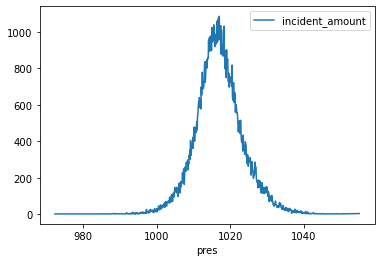

In [24]:
gun_weather_pres.plot(y='incident_amount')

<AxesSubplot:xlabel='pres'>

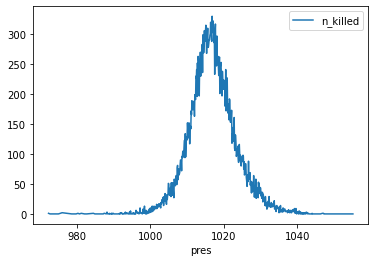

In [25]:
gun_weather_pres.plot(y='n_killed')

<AxesSubplot:xlabel='pres'>

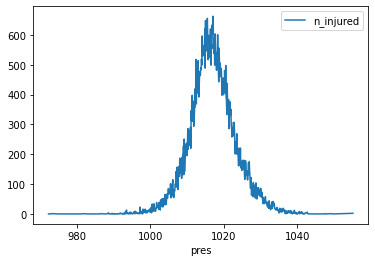

In [26]:
gun_weather_pres.plot(y='n_injured')

In [28]:
gun_weather_prcp = gun_weather.groupby(['prcp']).sum()

In [29]:
gun_weather_prcp.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,tmin,tmax,snow,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
count,6.050000e+02,605.000000,605.000000,6.050000e+02,6.050000e+02,605.000000,6.050000e+02,6.050000e+02,6.050000e+02,605.000000,...,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000,605.000000
mean,1.225483e+08,68.138843,134.654545,8.805302e+03,-2.081528e+04,150.525620,3.680893e+03,2.495455e+03,4.971842e+03,1222.330579,...,175.877686,11.841322,0.578512,14.125620,165.226446,4.809917,2.879339,82.514050,86.252893,8.943802
std,2.210429e+09,1236.170812,2398.789048,1.568789e+05,3.759327e+05,2707.401626,6.612389e+04,4.328919e+04,9.089736e+04,17957.330334,...,3150.262338,214.087757,10.523037,254.418563,2965.868319,86.806449,51.815902,1454.335415,1563.790580,166.057349
min,1.042460e+05,0.000000,0.000000,2.138700e+01,-9.236634e+06,0.000000,-1.300000e+01,-1.830000e+01,-8.900000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.068770e+05,0.000000,1.000000,6.879300e+01,-2.147503e+03,1.000000,2.820000e+01,2.390000e+01,4.000000e+01,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.980362e+06,2.000000,3.000000,1.947598e+02,-4.547126e+02,3.000000,1.016000e+02,8.050000e+01,1.265000e+02,0.000000,...,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,2.000000,0.000000
75%,1.355166e+07,8.000000,16.000000,9.595003e+02,-1.603452e+02,17.000000,4.561000e+02,3.633000e+02,5.643000e+02,50.000000,...,19.000000,2.000000,0.000000,2.000000,19.000000,1.000000,0.000000,10.000000,10.000000,1.000000
max,5.431096e+10,30373.000000,58937.000000,3.853963e+06,-6.786540e+01,66519.000000,1.624994e+06,1.063638e+06,2.233988e+06,437913.000000,...,77393.000000,5260.000000,258.000000,6251.000000,72863.000000,2133.000000,1272.000000,35725.000000,38420.000000,4081.000000


<AxesSubplot:xlabel='prcp'>

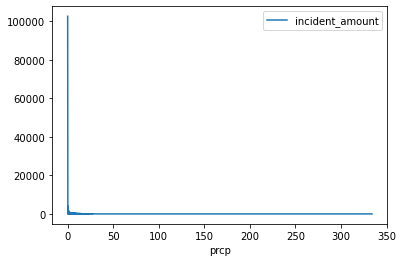

In [30]:

gun_weather_prcp.plot(y='incident_amount')

<AxesSubplot:xlabel='prcp'>

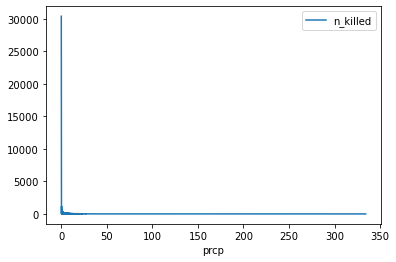

In [31]:
gun_weather_prcp.plot(y='n_killed')

<AxesSubplot:xlabel='prcp'>

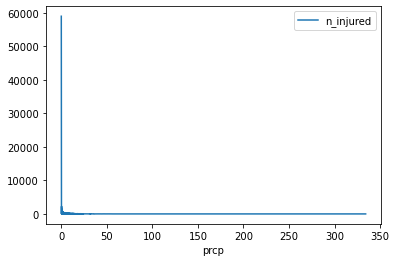

In [32]:
gun_weather_prcp.plot(y='n_injured')

In [34]:
gun_weather_wind = gun_weather.groupby(['wspd']).sum()

In [35]:
gun_weather_wind.describe()

,incident_id,n_killed,n_injured,latitude,longitude,n_guns_involved,tavg,tmin,tmax,prcp,...,participant_suspect_male,participant_suspect_female,participant_suspect_child,participant_suspect_teen,participant_suspect_adult,participant_suspect_injured,participant_suspect_injured_arrested,participant_suspect_unharmed,participant_suspect_unharmed_arrested,participant_suspect_killed
count,4.320000e+02,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,...,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,1.954120e+08,109.662037,208.898148,13999.080295,-33142.183054,244.252315,5850.291667,3966.662731,7887.521528,778.983102,...,286.805556,20.004630,1.041667,23.206019,271.432870,7.949074,4.768519,130.532407,144.173611,15.122685
std,3.042665e+08,169.789802,328.853459,21728.579026,52057.818080,368.138181,9811.888878,6847.246604,13130.558175,1341.349120,...,443.234299,30.189886,1.812082,36.762506,423.593998,13.167217,7.357439,203.859737,220.773540,22.871805
min,1.302460e+05,0.000000,0.000000,30.047000,-322013.925000,0.000000,-27.000000,-48.600000,-21.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.416234e+06,4.000000,8.750000,595.247625,-44545.649575,10.750000,135.875000,64.300000,210.650000,39.500000,...,11.750000,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,5.000000,5.750000,0.000000
50%,7.570189e+07,37.000000,78.500000,5216.585950,-11790.987200,93.000000,1743.700000,1100.650000,2396.300000,248.750000,...,103.000000,8.000000,0.000000,7.000000,92.500000,3.000000,2.000000,45.500000,50.500000,5.500000
75%,2.603059e+08,147.250000,269.500000,18838.830800,-1396.019525,338.500000,7631.975000,5219.150000,10294.150000,811.300000,...,399.250000,28.000000,1.000000,31.000000,373.750000,10.000000,6.000000,171.250000,200.500000,21.000000
max,1.847712e+09,1056.000000,2065.000000,132408.117300,-73.552100,2170.000000,62134.500000,44031.100000,83192.900000,7123.000000,...,2668.000000,164.000000,11.000000,202.000000,2552.000000,79.000000,41.000000,1265.000000,1282.000000,143.000000


<AxesSubplot:xlabel='wspd'>

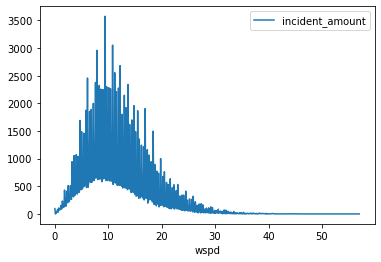

In [36]:
gun_weather_wind.plot(y='incident_amount')

<AxesSubplot:xlabel='wspd'>

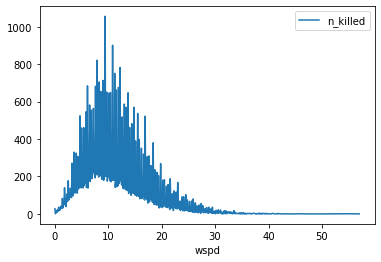

In [37]:
gun_weather_wind.plot(y='n_killed')

<AxesSubplot:xlabel='wspd'>

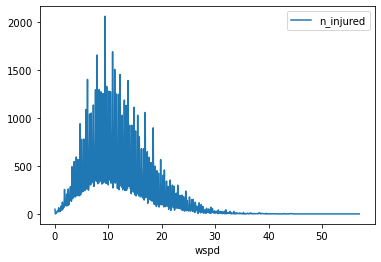

In [38]:
gun_weather_wind.plot(y='n_injured')